In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras import backend as K
from keras.models import Model
from keras.preprocessing import image
#from kt_utils import *

C:\Users\admin\Anaconda3\envs\keras1\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [4]:
data_ip = pd.read_csv("C:\\Users\\admin\\Documents\\Face_expressions\\train.csv")
data_ip.head()

,Emotion,Pixels
0,3,221 240 251 254 255 255 255 255 255 255 255 25...
1,6,100 107 108 104 103 113 117 115 120 130 138 14...
2,4,35 50 56 57 63 76 74 79 85 86 105 133 145 152 ...
3,6,119 124 129 135 136 140 142 149 159 156 163 16...
4,2,160 173 186 194 188 185 175 162 153 143 135 12...


In [5]:
X = data_ip['Pixels']
Y = data_ip['Emotion']
X = X.str.split(' ')

In [6]:
X = np.array(X)
X = [list(map(int, i)) for i in X]
X = [np.array(i) for i in X]
X = np.array(X)
X.shape

(4178, 2304)

In [7]:
X = X.reshape(X.shape[0],48,48)

In [9]:
X_train = X[:-500,:,:]
X_test = X[-500:,:,:]

X_train.shape,X_test.shape
X_train = X_train/255.

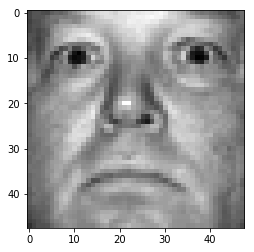

In [10]:
plt.imshow(X_train[1],cmap='gray')

In [11]:
P = []
Y = data_ip['Emotion']
for i in range(0,len(Y)):
    Y_op = [0]*7
    #print(Y[i])
    Y_op[Y[i]-1] = 1
    P.append(Y_op)
P = np.array(P)
Y_train = P[:-500]
Y_test = P[-500:]
'''Y = np.array(data_ip['Emotion'])
Y_train = Y[:-500]
Y_test = Y[-500:]'''
Y_train

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [12]:
X_train = X_train.reshape(X_train.shape[0],48,48,1)

In [17]:
def EmotionModel(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(filters = 16 , kernel_size = [6,6], strides=(1, 1), padding='valid',name = 'conv1')(X_input)
    X = BatchNormalization(axis=3,name = 'batch1')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = 32 , kernel_size = [8,8], strides=(1, 1), padding='valid',name = 'conv2')(X)
    X = BatchNormalization(axis=3, name = 'batch2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = 64 , kernel_size = [6,6], strides=(1, 1), padding='valid',name = 'conv3')(X)
    X = BatchNormalization(axis=3, name = 'batch3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = 128 , kernel_size = [6,6], strides=(1, 1), padding='valid',name = 'conv4')(X)
    X = BatchNormalization(axis=3, name = 'batch4')(X)
    X = Activation('relu')(X)
    
    
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Flatten()(X)
    
    X = Dense(7, activation='softmax',name = 'actv')(X)
    print(X)
    model = Model(inputs = X_input,outputs = X,name = 'EmotionModel')
    
    
    return model

In [18]:
emotionModel = EmotionModel(input_shape=(48,48,1))

Tensor("actv_1/Softmax:0", shape=(?, 7), dtype=float32)


In [19]:
emotionModel.compile(optimizer = 'adam', loss='mean_squared_error', metrics=['accuracy'])

In [20]:
emotionModel.fit(X_train, Y_train,epochs=20, batch_size=32)

Epoch 1/20
3678/3678 [==============================] - 581s 158ms/step - loss: 0.1656 - acc: 0.3187
Epoch 2/20
3678/3678 [==============================] - 570s 155ms/step - loss: 0.1271 - acc: 0.4304
Epoch 3/20
3678/3678 [==============================] - 632s 172ms/step - loss: 0.1056 - acc: 0.5324
Epoch 4/20
3678/3678 [==============================] - 553s 150ms/step - loss: 0.0929 - acc: 0.5935
Epoch 5/20
3678/3678 [==============================] - 620s 169ms/step - loss: 0.0976 - acc: 0.5775
Epoch 6/20
3678/3678 [==============================] - 615s 167ms/step - loss: 0.0880 - acc: 0.6188
Epoch 7/20
3678/3678 [==============================] - 559s 152ms/step - loss: 0.0831 - acc: 0.6430
Epoch 8/20
3678/3678 [==============================] - 572s 155ms/step - loss: 0.0802 - acc: 0.6566
Epoch 9/20
3678/3678 [==============================] - 638s 173ms/step - loss: 0.0729 - acc: 0.6887
Epoch 10/20
3678/3678 [==============================] - 575s 156ms/step - loss: 0.0694 - a